# Results analyzed and exported to use in figures

In [1]:
# Libraries
import seaborn as sns
import numpy as np
from pathlib import Path
import sys
import pandas as pd
import math

# Add /Source to sys.path if not already present
project_root = Path.cwd().parent
source_path = project_root / "src"

if source_path.exists() and str(source_path) not in sys.path:
    sys.path.insert(0, str(source_path))

# Utility functions
from calcium_activity_characterization.analysis.visualizers import (
    plot_violin,
    plot_points_mean_std,
    visualize_image,
    plot_scatter_size_coded,
    plot_histogram,
    plot_histogram_by_group,
    plot_pie_chart,
    plot_bar,
    plot_xy_with_regression,
    plot_heatmap,
    plot_early_peakers_heatmap,
    plot_category_distribution_by_dataset
    )
from calcium_activity_characterization.io.csv_loader import load_dataset
from calcium_activity_characterization.analysis.statistics import (
    analyze_peak_intervals,
    build_neighbor_pair_stats
)

sns.set(style="whitegrid")

# Define paths to control datasets
path = "D:/Mateo/Results"

# Load and merge datasets
peaks = load_dataset(path=path, file_name="merged_peaks.csv")
cells = load_dataset(path=path, file_name="merged_cells.csv")
events = load_dataset(path=path, file_name="merged_events.csv")
communications = load_dataset(path=path, file_name="merged_communications.csv")
experiments = load_dataset(path=path, file_name="experiments.csv")

# Define control datasets
cells_counts = cells.groupby("dataset")["Cell ID"].count()
experiments["Number of cells"] = experiments["dataset"].map(cells_counts)

control_experiments = experiments[(experiments["condition"] == "control - 1st run") &
                                  (experiments["Number of cells"] > 900)].copy()

control_peaks = peaks[peaks["dataset"].isin(control_experiments["dataset"])].copy()
control_cells = cells[cells["dataset"].isin(control_experiments["dataset"])].copy()
control_events = events[events["dataset"].isin(control_experiments["dataset"])].copy()
control_communications = communications[communications["dataset"].isin(control_experiments["dataset"])].copy()

reference_dataset = experiments[experiments["dataset"] == "20250326_IS1"].copy()
reference_peaks = peaks[peaks["dataset"].isin(reference_dataset["dataset"])].copy()
reference_cells = cells[cells["dataset"].isin(reference_dataset["dataset"])].copy()
reference_events = events[events["dataset"].isin(reference_dataset["dataset"])].copy()
reference_communications = communications[communications["dataset"].isin(reference_dataset["dataset"])].copy()

figure_path=Path("C:/Users/poseidon/OneDrive/Documents/01_ETHZ/Master_Degree/Spring_Semester_2025/Master_Thesis/Report/Figures")

c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\io\csv_loader.py:33: DtypeWarning: Columns (29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(f"{path}/{file_name}")
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\io\csv_loader.py:33: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(f"{path}/{file_name}")
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\io\csv_loader.py:33: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(f"{path}/{file_name}")


## FIGURE 3.1

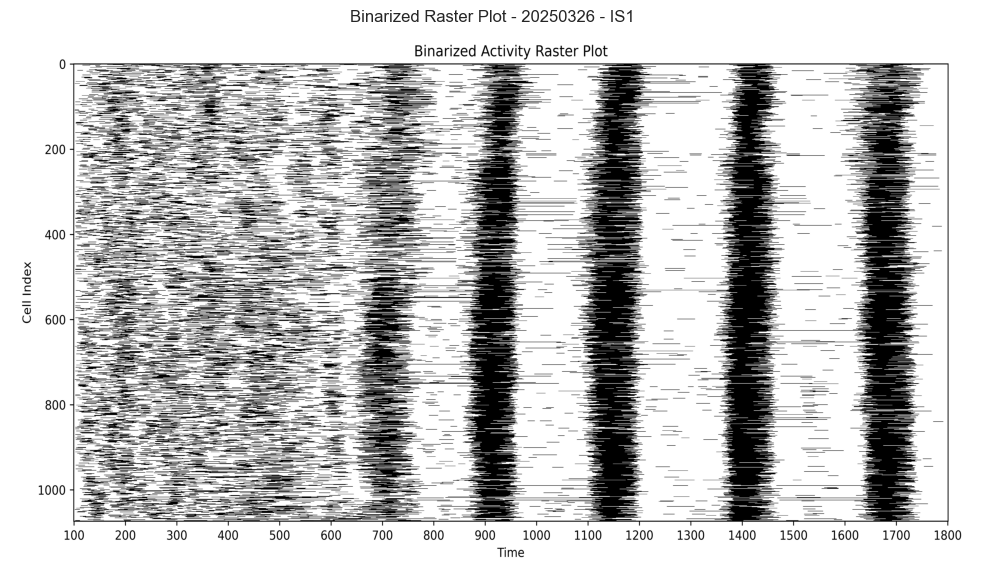

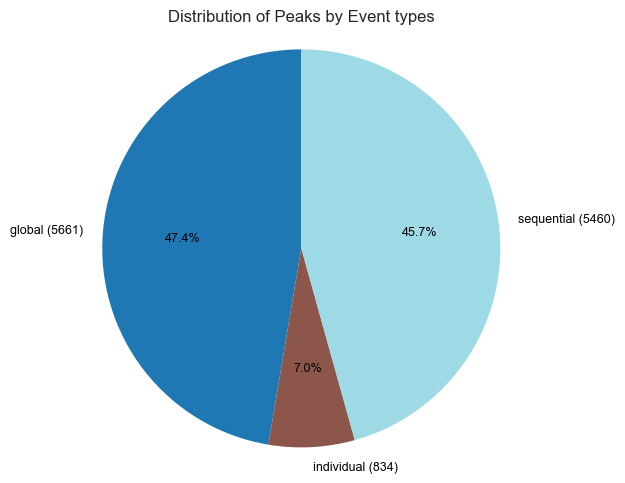

[2025-08-17 11:23:47] [INFO] calcium: plot_histogram_by_group: removed 23 outliers out of 11955 on 'Duration (s)' (lower=-132, upper=225)


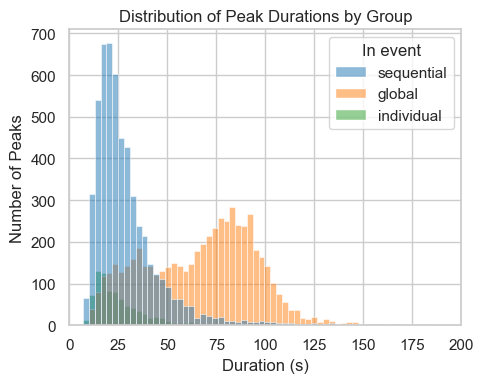

[2025-08-17 11:23:47] [INFO] calcium: plot_histogram_by_group: removed 52 outliers out of 11955 on 'Prominence (noise std units)' (lower=-210.35, upper=345.8)


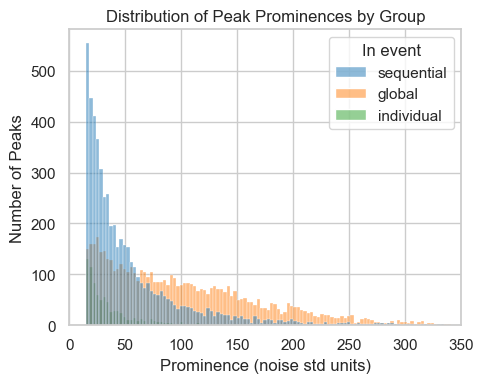

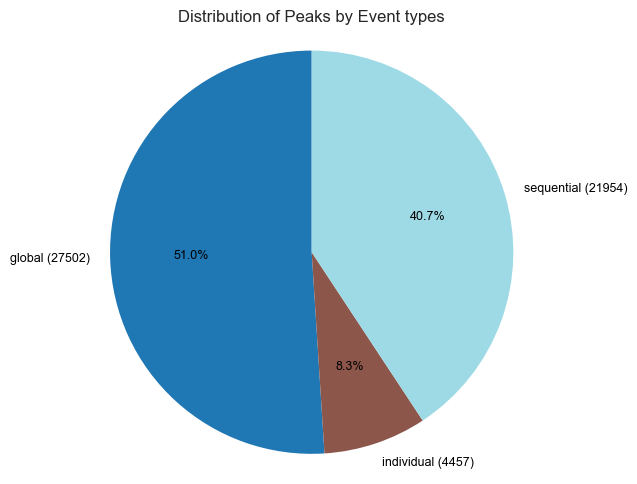

[2025-08-17 11:23:48] [INFO] calcium: plot_histogram_by_group: removed 40 outliers out of 53913 on 'Duration (s)' (lower=-134, upper=230)


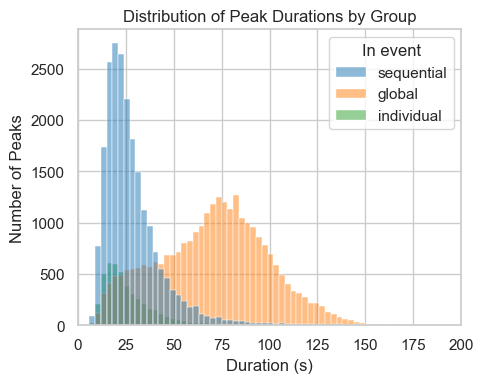

[2025-08-17 11:23:48] [INFO] calcium: plot_histogram_by_group: removed 128 outliers out of 53913 on 'Prominence (noise std units)' (lower=-391.6, upper=594.7)


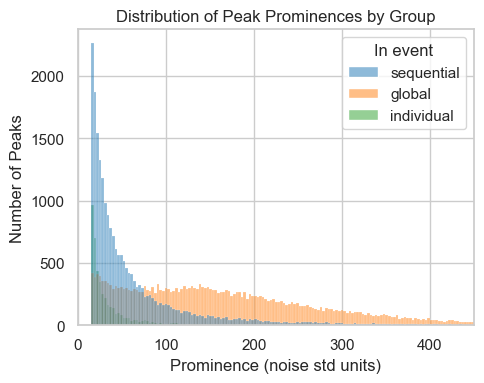

In [2]:
visualize_image(
    image_source=reference_dataset["path"],
    image_name="signal-processing/raster_plot.png",
    title=f"Binarized Raster Plot - {reference_dataset['date'][0]} - {reference_dataset['image_sequence'][0]}",
    figsize=(10, 6)
)

plot_pie_chart(
    df=reference_peaks,
    column="In event",
    title="Distribution of Peaks by Event types",
    palette="tab20",
    save_svg_path=figure_path / "figure_3_1/single_peaks_distribution_by_event.svg"
)

reference_peaks["In event"] = reference_peaks["In event"].fillna("individual")
plot_histogram_by_group(
    df=reference_peaks,
    value_column="Duration (s)",
    group_column="In event",
    title="Distribution of Peak Durations by Group",
    ylabel="Number of Peaks",
    bin_width=3,
    multiple="layer",
    palette="tab10",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 200),
    save_svg_path=figure_path / "figure_3_1/single_peaks_duration_by_event.svg"
)
plot_histogram_by_group(
    df=reference_peaks,
    value_column="Prominence (noise std units)",
    group_column="In event",
    title="Distribution of Peak Prominences by Group",
    ylabel="Number of Peaks",
    bin_width=3,
    multiple="layer",
    palette="tab10",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 350),
    save_svg_path=figure_path / "figure_3_1/single_peaks_prominence_by_event.svg"
)

plot_pie_chart(
    df=control_peaks,
    column="In event",
    title="Distribution of Peaks by Event types",
    palette="tab20",
    save_svg_path=figure_path / "figure_3_1/control_peaks_distribution_by_event.svg"
)

control_peaks["In event"] = control_peaks["In event"].fillna("individual")
plot_histogram_by_group(
    df=control_peaks,
    value_column="Duration (s)",
    group_column="In event",
    title="Distribution of Peak Durations by Group",
    ylabel="Number of Peaks",
    bin_width=3,
    multiple="layer",
    palette="tab10",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 200),
    save_svg_path=figure_path / "figure_3_1/control_peaks_duration_by_event.svg"
)
plot_histogram_by_group(
    df=control_peaks,
    value_column="Prominence (noise std units)",
    group_column="In event",
    title="Distribution of Peak Prominences by Group",
    ylabel="Number of Peaks",
    bin_width=3,
    multiple="layer",
    palette="tab10",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 450),
    save_svg_path=figure_path / "figure_3_1/control_peaks_prominence_by_event.svg"
)

## FIGURE 3.2

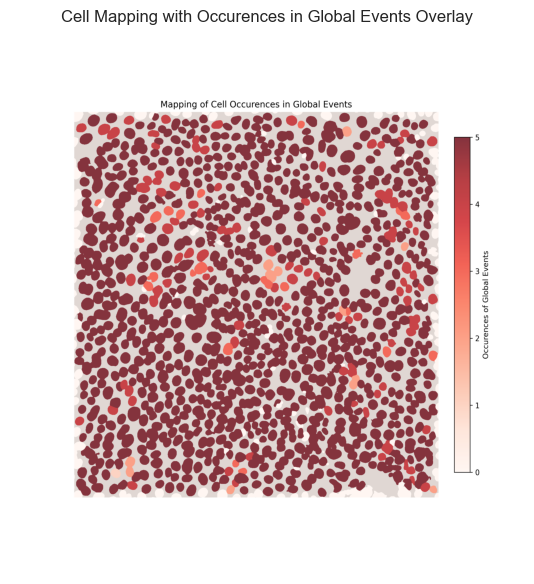

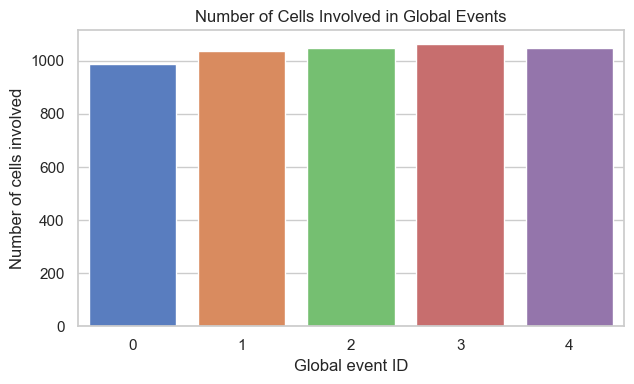

c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1374: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(


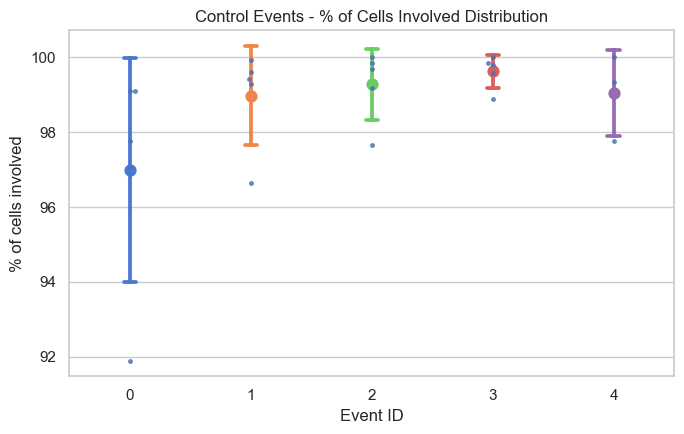

[2025-08-17 11:23:51] [INFO] calcium: plot_points_mean_std: removed 0 outliers out of 18 on 'interval' (lower=-57.25, upper=649.75)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1374: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(


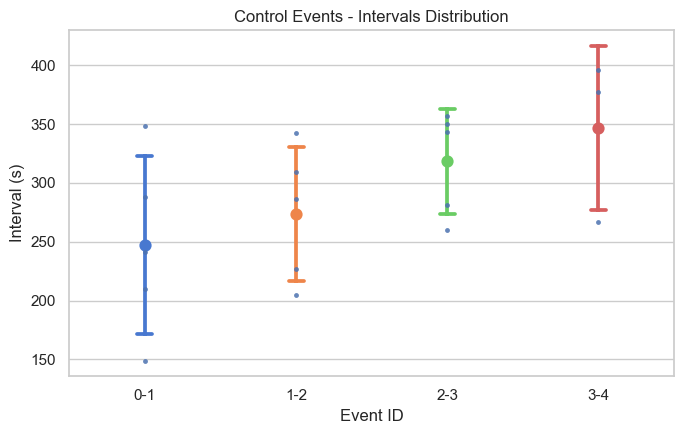

In [3]:
visualize_image(
    image_source=reference_dataset["path"],
    image_name="cell-mapping/cell_occurences_in_global_events_overlay.png",
    title="Cell Mapping with Occurences in Global Events Overlay",
    figsize=(5.5, 6)
)

reference_global_events = reference_events[reference_events["Event type"] == "GlobalEvent"].copy()
reference_global_events["% of cells involved"] = 100 * reference_global_events["Number of cells involved"] / len(cells)

plot_bar(
    df=reference_global_events,
    axis_column="Event ID",
    value_column="Number of cells involved",
    title="Number of Cells Involved in Global Events",
    ylabel="Number of cells involved",
    xlabel="Global event ID",
    rotation=0,
    save_svg_path=figure_path / "figure_3_2/reference_global_events_cells_involved_barplot.svg",
)

control_global_events = control_events[control_events["Event type"] == "GlobalEvent"].copy()

cell_counts = cells.groupby("dataset").size().rename("Total number of cells").reset_index()
control_global_events = control_global_events.merge(cell_counts, on="dataset", how="left")

control_global_events["% of cells involved"] = (100 * control_global_events["Number of cells involved"] / control_global_events["Total number of cells"]).round(2)

plot_points_mean_std(
    df=control_global_events,
    x="Event ID",
    y="% of cells involved",
    title="Control Events - % of Cells Involved Distribution",
    ylabel="% of cells involved",
    xlabel="Event ID",
    filter_outliers=False,
    outliers_bounds=(3, 3),
    save_svg_path=figure_path / "figure_3_2/control_global_events_percentage_cells_involved_pointplot.svg"
)

intervals_list = []
periodicity_list = []

for dataset_name, df_subset in control_global_events.groupby("dataset"):
    intervals, periodicity, frequency = analyze_peak_intervals(df_subset["Event peak time (s)"].tolist())
    periodicity_list.append({
        "dataset": dataset_name,
        "periodicity": periodicity,
        "frequency": frequency if periodicity > 0.8 else None
    })
    for idx, val in enumerate(intervals):
        intervals_list.append({
            "dataset": dataset_name,
            "index": f"{idx}-{idx+1}",
            "interval": val
        })

intervals_df = pd.DataFrame(intervals_list)
periodicity_df = pd.DataFrame(periodicity_list)

plot_points_mean_std(
    df=intervals_df,
    x="index",
    y="interval",
    title="Control Events - Intervals Distribution",
    ylabel="Interval (s)",
    xlabel="Event ID",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    save_svg_path=figure_path / "figure_3_2/control_events_intervals_distribution.svg"
)

## FIGURE 3.3

[2025-08-17 11:23:51] [INFO] calcium: plot_histogram_by_group: removed 36 outliers out of 27502 on 'Duration (s)' (lower=-74, upper=213)


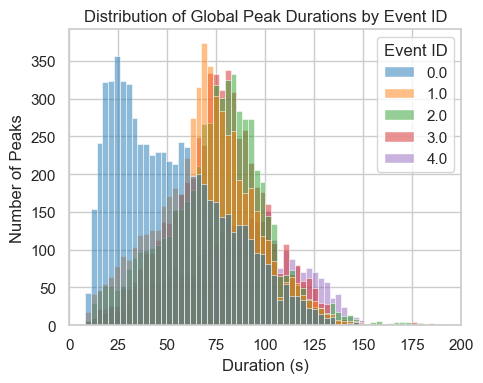

[2025-08-17 11:23:52] [INFO] calcium: plot_histogram_by_group: removed 30 outliers out of 27502 on 'Prominence (noise std units)' (lower=-389, upper=703)


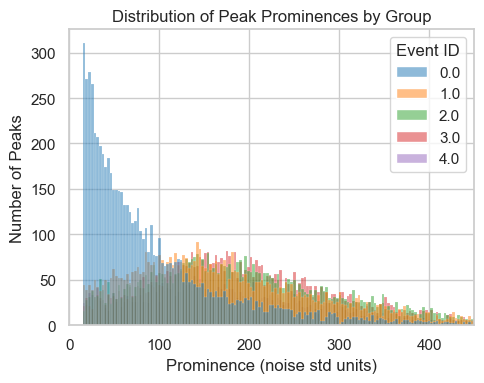

[2025-08-17 11:23:54] [INFO] calcium: plot_violin: removed 56 outliers out of 27502 on 'Duration (s)' (lower=-104, upper=222)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1085: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(**violin_kwargs)
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp_ax = sns.boxplot(


[2025-08-17 11:23:54] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\figure_3_3\control_peaks_duration_by_event.svg (svg)


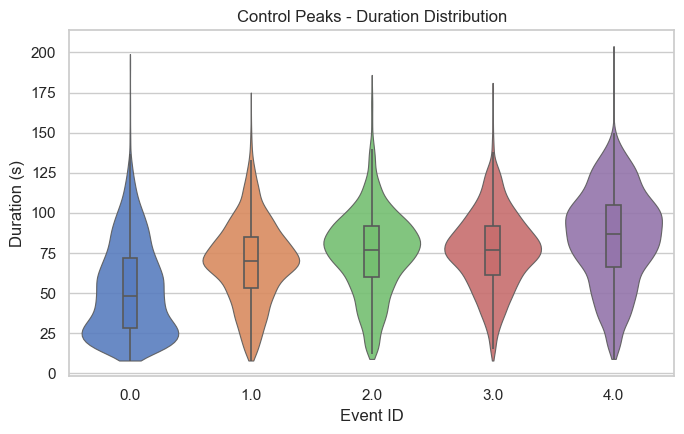

[2025-08-17 11:23:54] [INFO] calcium: plot_violin: removed 132 outliers out of 27502 on 'Prominence (noise std units)' (lower=-352.28, upper=714.7)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1085: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(**violin_kwargs)
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp_ax = sns.boxplot(


[2025-08-17 11:23:55] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\figure_3_3\control_peaks_prominence_by_event.svg (svg)


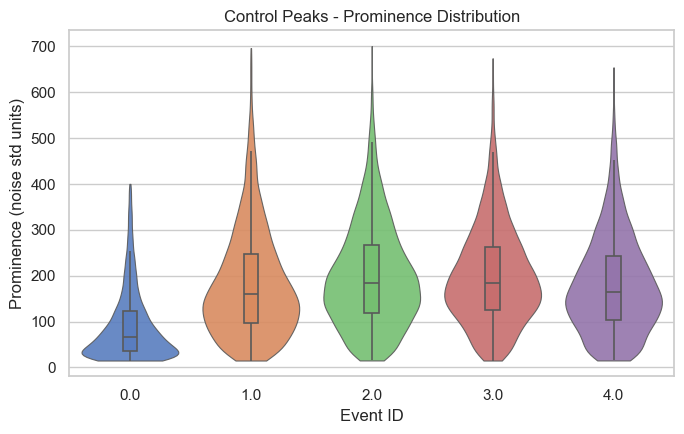

[2025-08-17 11:23:55] [INFO] calcium: plot_points_mean_std: removed 0 outliers out of 23 on 'Time to 50% (s)' (lower=22, upper=99)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1374: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(


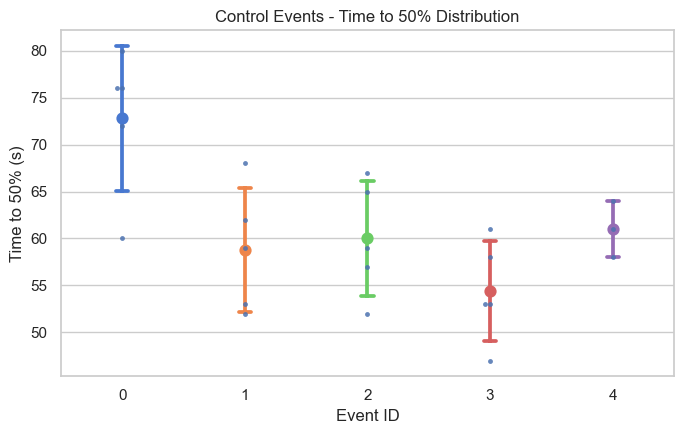

[2025-08-17 11:23:55] [INFO] calcium: plot_points_mean_std: removed 0 outliers out of 23 on 'Normalized peak rate at 50% (% of peaks/s)' (lower=-0.45, upper=4.45)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1374: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(


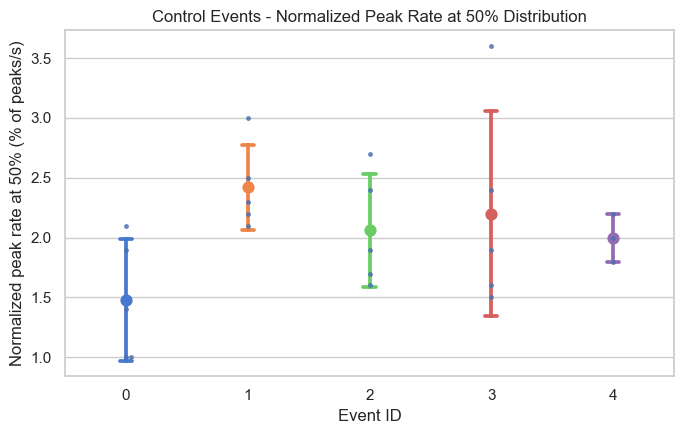

In [4]:
plot_histogram_by_group(
    df=control_peaks[control_peaks["In event"] == "global"],
    value_column="Duration (s)",
    group_column="Event ID",
    title="Distribution of Global Peak Durations by Event ID",
    ylabel="Number of Peaks",
    bin_width=3,
    multiple="layer",
    palette="tab10",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 200),
    save_svg_path=figure_path / "figure_3_3/single_peaks_duration_by_event.svg"
)
plot_histogram_by_group(
    df=control_peaks[control_peaks["In event"] == "global"],
    value_column="Prominence (noise std units)",
    group_column="Event ID",
    title="Distribution of Peak Prominences by Group",
    ylabel="Number of Peaks",
    bin_width=3,
    multiple="layer",
    palette="tab10",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 450),
    save_svg_path=figure_path / "figure_3_3/single_peaks_prominence_by_event.svg"
)

mapping_events_to_peaks = control_events.loc[control_events["Event type"] == "GlobalEvent", ["Event ID", "dataset"]]
subset_peaks_global_events = control_peaks.merge(mapping_events_to_peaks, 
                                                     on=["Event ID", "dataset"], 
                                                     how="inner", 
                                                     validate="m:1")

plot_violin(
    df=subset_peaks_global_events,
    x="Event ID",
    y="Duration (s)",
    title="Control Peaks - Duration Distribution",
    ylabel="Duration (s)",
    xlabel="Event ID",
    width=0.8,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Event ID",
    dodge=False,
    save_svg_path=figure_path / "figure_3_3/control_peaks_duration_by_event.svg"
)
plot_violin(
    df=subset_peaks_global_events,
    x="Event ID",
    y="Prominence (noise std units)",
    title="Control Peaks - Prominence Distribution",
    ylabel="Prominence (noise std units)",
    xlabel="Event ID",
    width=0.8,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Event ID",
    dodge=False,
    save_svg_path=figure_path / "figure_3_3/control_peaks_prominence_by_event.svg"
)

plot_points_mean_std(
    df=control_global_events,
    x="Event ID",
    y="Time to 50% (s)",
    title="Control Events - Time to 50% Distribution",
    ylabel="Time to 50% (s)",
    xlabel="Event ID",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    save_svg_path=figure_path / "figure_3_3/control_events_time_to_50_percent_pointplot.svg"
)
plot_points_mean_std(
    df=control_global_events,
    x="Event ID",
    y="Normalized peak rate at 50% (% of peaks/s)",
    title="Control Events - Normalized Peak Rate at 50% Distribution",
    ylabel="Normalized peak rate at 50% (% of peaks/s)",
    xlabel="Event ID",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    save_svg_path=figure_path / "figure_3_3/control_events_normalized_peak_rate_at_50_percent_pointplot.svg"
)

## Figure 3.4

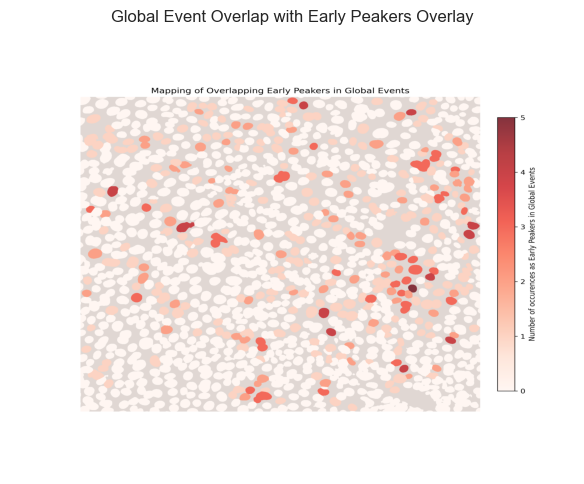

[2025-08-17 11:29:13] [INFO] calcium: Early peakers matrix: 336 cells x 5 columns (max_occ=5); black squares: 516


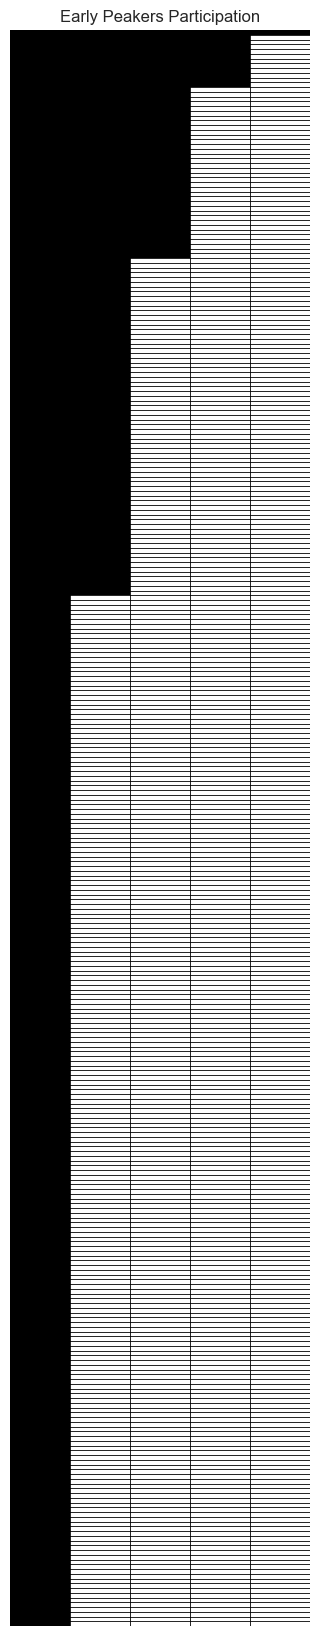

[2025-08-17 11:29:15] [INFO] calcium: Saved early peakers heatmap SVG to: C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\figure_3_4\global_events_early_peakers_heatmap.svg


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:466: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([dataset_col, category_col])


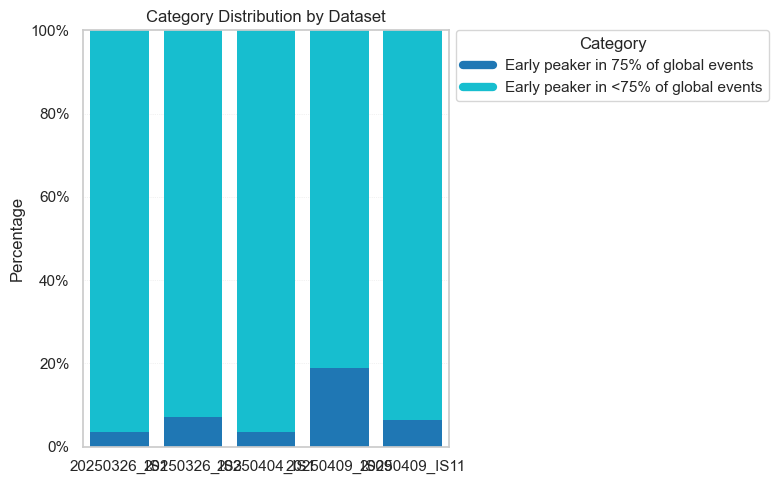

WindowsPath('C:/Users/poseidon/OneDrive/Documents/01_ETHZ/Master_Degree/Spring_Semester_2025/Master_Thesis/Report/Figures/figure_3_4/control_cells_early_peakers_in_75_percent_global_events_distribution_by_dataset.svg')

In [ ]:
visualize_image(
    image_source=reference_dataset["path"],
    image_name="cell-mapping/global_events/global_event_overlap_early_peakers_overlay.png",
    title="Global Event Overlap with Early Peakers Overlay",
)

plot_early_peakers_heatmap(
    cells=reference_cells,
    total_events=len(reference_global_events),
    output_svg=figure_path / "figure_3_4/global_events_early_peakers_heatmap.svg",
)

total_events = len(reference_global_events)
threshold_count = math.ceil(0.75 * total_events)

reference_cells["early peakers in 75% of global events"] = (
    reference_cells["Occurences in global events as early peaker"].fillna(0).astype(int) >= threshold_count
)

events_per_ds = control_global_events.groupby("dataset")["Event ID"].nunique().rename("total_events")
totals = control_cells["dataset"].map(events_per_ds).fillna(0).astype(int)
threshold_count = np.ceil(0.75 * totals).astype(int)

control_cells["early peakers in 75% of global events"] = (
    control_cells["Occurences in global events as early peaker"].fillna(0).astype(int) >= threshold_count
)

col = "early peakers in 75% of global events"

control_cells[col] = (
    control_cells[col]
    .map({
        True:  "Early peaker in 75% of global events",
        False: "Early peaker in <75% of global events",
    })
    .astype("category")  # optional: nice for plotting
)

plot_category_distribution_by_dataset(
    df=control_cells[control_cells["Occurences in global events as early peaker"] > 0],
    category_col="early peakers in 75% of global events",
    dataset_col="dataset",
    save_path=figure_path / "figure_3_4/control_cells_early_peakers_in_75_percent_global_events_distribution_by_dataset.svg"
)

## Figure 3.5

[2025-08-17 11:23:58] [INFO] calcium: plot_histogram: removed 135 outliers out of 5460 on 'Duration (s)' (lower=-30, upper=82)
[2025-08-17 11:23:58] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\figure_3_5\reference_peaks_duration_distribution.svg (svg)


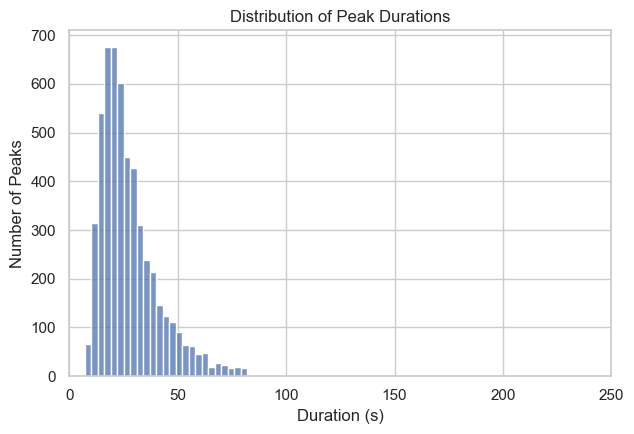

[2025-08-17 11:23:58] [INFO] calcium: plot_histogram: removed 160 outliers out of 5460 on 'Prominence (noise std units)' (lower=-109.6, upper=201.2)
[2025-08-17 11:23:58] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\figure_3_5\reference_peaks_prominence_distribution.svg (svg)


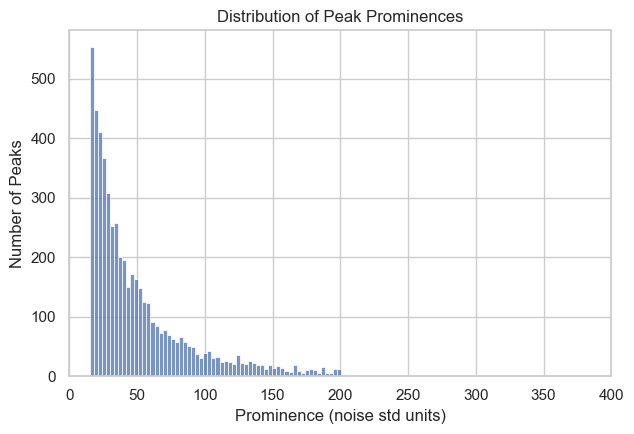

[2025-08-17 11:23:58] [INFO] calcium: plot_histogram: removed 7 outliers out of 4293 on 'Speed (um/s)' (lower=-11.52, upper=27.36)
[2025-08-17 11:23:59] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\figure_3_5\communications_speed_distribution.svg (svg)


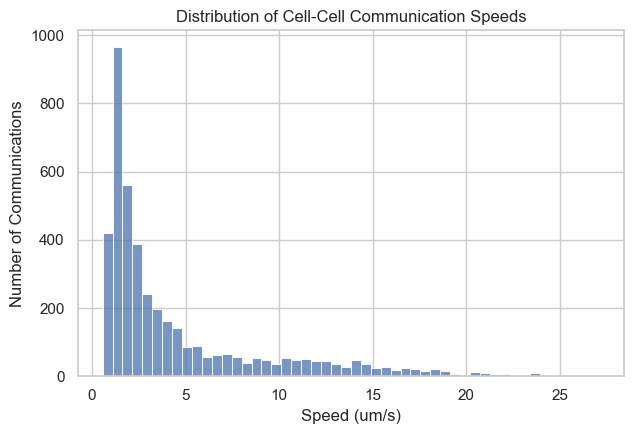

[2025-08-17 11:23:59] [INFO] calcium: plot_histogram: removed 0 outliers out of 1167 on 'Number of cells involved' (lower=-10, upper=26)
[2025-08-17 11:23:59] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\figure_3_5\reference_sequential_events_number_of_cells_involved_distribution.svg (svg)


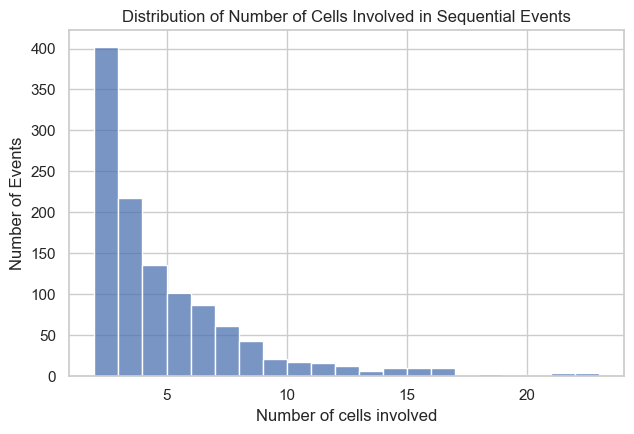

[2025-08-17 11:23:59] [INFO] calcium: plot_violin: removed 378 outliers out of 21954 on 'Duration (s)' (lower=-36, upper=90)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1085: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(**violin_kwargs)


[2025-08-17 11:24:00] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\figure_3_5\control_peaks_duration_distribution.svg (svg)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp_ax = sns.boxplot(


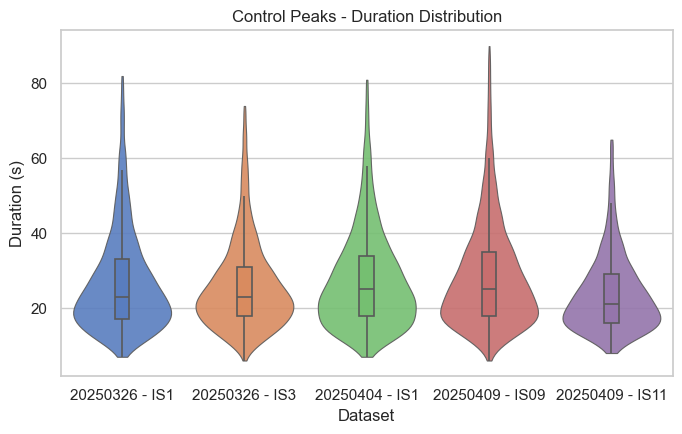

[2025-08-17 11:24:00] [INFO] calcium: plot_violin: removed 651 outliers out of 21954 on 'Prominence (noise std units)' (lower=-243.1, upper=392.5)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1085: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(**violin_kwargs)
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp_ax = sns.boxplot(


[2025-08-17 11:24:00] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\figure_3_5\control_peaks_prominence_distribution.svg (svg)


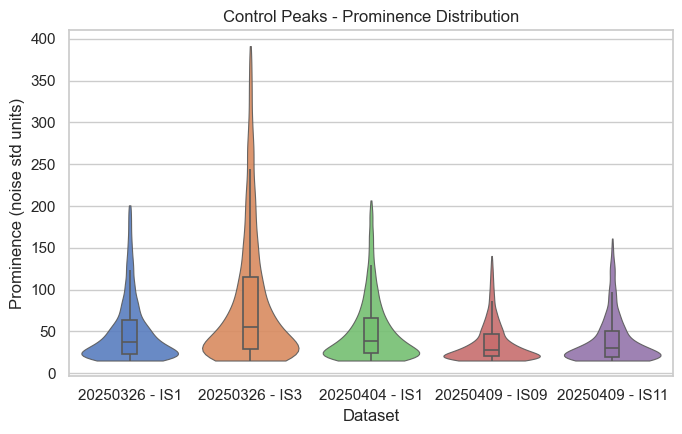

[2025-08-17 11:24:00] [INFO] calcium: plot_violin: removed 43 outliers out of 17179 on 'Speed (um/s)' (lower=-16.555, upper=37.31)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1085: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(**violin_kwargs)
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp_ax = sns.boxplot(


[2025-08-17 11:24:01] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\figure_3_5\control_communications_speed_distribution.svg (svg)


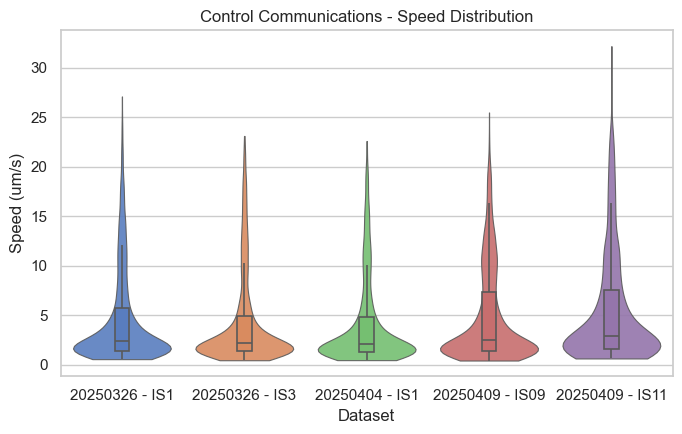

[2025-08-17 11:24:01] [INFO] calcium: plot_violin: removed 37 outliers out of 4775 on 'Number of cells involved' (lower=-10, upper=26)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1085: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(**violin_kwargs)
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp_ax = sns.boxplot(


[2025-08-17 11:24:01] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\figure_3_5\control_events_number_of_cells_involved_distribution.svg (svg)


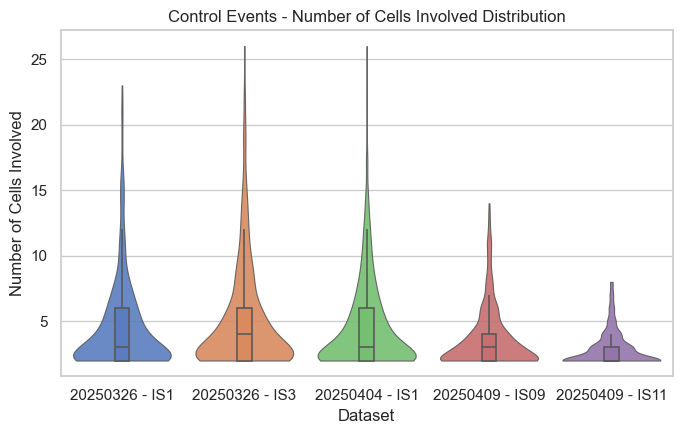

In [6]:
plot_histogram(
    df=reference_peaks[reference_peaks["In event"] == "sequential"],
    column="Duration (s)",
    title="Distribution of Peak Durations",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 250),
    save_svg_path=figure_path / "figure_3_5/reference_peaks_duration_distribution.svg"
)
plot_histogram(
    df=reference_peaks[reference_peaks["In event"] == "sequential"],
    column="Prominence (noise std units)",
    title="Distribution of Peak Prominences",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 400),
    save_svg_path=figure_path / "figure_3_5/reference_peaks_prominence_distribution.svg"
)
plot_histogram(
    df=reference_communications,
    column="Speed (um/s)",
    title="Distribution of Cell-Cell Communication Speeds",
    ylabel="Number of Communications",
    bin_count=50,
    filter_outliers=True,
    outliers_bounds=(3, 5),
    return_outliers=False,
    save_svg_path=figure_path / "figure_3_5/communications_speed_distribution.svg"
)
reference_sequential_events = reference_events[reference_events["Event type"] == "SequentialEvent"].copy()
plot_histogram(
    df=reference_sequential_events,
    column="Number of cells involved",
    title="Distribution of Number of Cells Involved in Sequential Events",
    ylabel="Number of Events",
    bin_width=1,
    filter_outliers=True,
    outliers_bounds=(3, 5),
    save_svg_path=figure_path / "figure_3_5/reference_sequential_events_number_of_cells_involved_distribution.svg"
)


control_peaks["dataset name"] = control_peaks['date'].astype(str) + " - " + control_peaks['image_sequence'].astype(str)

mapping_events_to_peaks = control_events.loc[control_events["Event type"] == "SequentialEvent", ["Event ID", "dataset"]]
subset_peaks_sequential_events = control_peaks.merge(mapping_events_to_peaks, 
                                                     on=["Event ID", "dataset"], 
                                                     how="inner", 
                                                     validate="m:1")

plot_violin(
    df=subset_peaks_sequential_events,
    x="dataset name",
    y="Duration (s)",
    title="Control Peaks - Duration Distribution",
    ylabel="Duration (s)",
    xlabel="Dataset",
    width=0.8,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    dodge=False,
    outliers_bygroup="dataset name",
    save_svg_path=figure_path / "figure_3_5/control_peaks_duration_distribution.svg"
)

plot_violin(
    df=subset_peaks_sequential_events,
    x="dataset name",
    y="Prominence (noise std units)",
    title="Control Peaks - Prominence Distribution",
    ylabel="Prominence (noise std units)",
    xlabel="Dataset",
    width=0.8,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    dodge=False,
    outliers_bygroup="dataset name",
    save_svg_path=figure_path / "figure_3_5/control_peaks_prominence_distribution.svg"
)

control_communications["dataset name"] = control_communications['date'].astype(str) + " - " + control_communications['image_sequence'].astype(str)

plot_violin(
    df=control_communications,
    x="dataset name",
    y="Speed (um/s)",
    title="Control Communications - Speed Distribution",
    ylabel="Speed (um/s)",
    xlabel="Dataset",
    width=0.8,
    filter_outliers=True,
    outliers_bounds=(3, 5),
    dodge=False,
    outliers_bygroup="dataset name",
    save_svg_path=figure_path / "figure_3_5/control_communications_speed_distribution.svg"
)

control_events["dataset name"] = control_events['date'].astype(str) + " - " + control_events['image_sequence'].astype(str)
control_sequential_events = control_events[control_events["Event type"] == "SequentialEvent"].copy()


plot_violin(
    df=control_sequential_events,
    x="dataset name",
    y="Number of cells involved",
    title="Control Events - Number of Cells Involved Distribution",
    ylabel="Number of Cells Involved",
    xlabel="Dataset",
    width=0.8,
    filter_outliers=True,
    outliers_bounds=(3, 5),
    dodge=False,
    outliers_bygroup="dataset name",
    save_svg_path=figure_path / "figure_3_5/control_events_number_of_cells_involved_distribution.svg"
)

## FIGURE 3.6

In [7]:
def seq_events_category(n: int) -> str:
    if n == 2:
        return "02"
    elif n == 3:
        return "03"
    elif n == 4:
        return "04"
    elif n == 5:
        return "05"
    elif n == 6:
        return "06"
    elif n == 7:
        return "07"
    elif n == 8:
        return "08"
    elif n == 9:
        return "09"
    else:
        return "10+"

control_sequential_events["Number of cells involved category"] = control_sequential_events["Number of cells involved"].apply(seq_events_category)

seq_map = (
    control_sequential_events[
        ["dataset", "Event ID", "Number of cells involved category"]
    ].drop_duplicates(subset=["dataset", "Event ID"])
)

subset_peaks_sequential_events = subset_peaks_sequential_events.merge(
    seq_map,
    how="left",
    on=["dataset", "Event ID"]
)

control_communications = control_communications.merge(
    seq_map,
    how="left",
    on=["dataset", "Event ID"]
)


[2025-08-17 11:24:01] [INFO] calcium: plot_violin: removed 375 outliers out of 21954 on 'Duration (s)' (lower=-32, upper=85.25)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1085: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(**violin_kwargs)
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp_ax = sns.boxplot(


[2025-08-17 11:24:02] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\figure_3_6\distribution_of_peak_values_by_number_of_cells_involved.svg (svg)


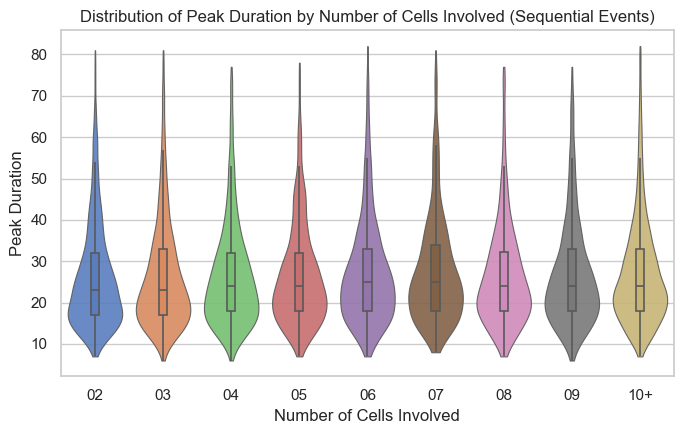

[2025-08-17 11:24:02] [INFO] calcium: plot_violin: removed 894 outliers out of 21954 on 'Prominence (noise std units)' (lower=-181.9, upper=304.6)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1085: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(**violin_kwargs)
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp_ax = sns.boxplot(


[2025-08-17 11:24:02] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\figure_3_6\distribution_of_peak_values_by_number_of_cells_involved_prominence.svg (svg)


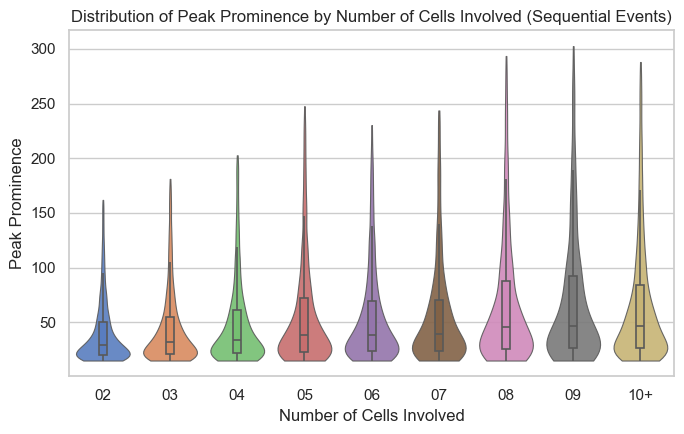

[2025-08-17 11:24:02] [INFO] calcium: plot_violin: removed 487 outliers out of 17179 on 'Speed (um/s)' (lower=-13.622, upper=21.71)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1085: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(**violin_kwargs)
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp_ax = sns.boxplot(


[2025-08-17 11:24:03] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\figure_3_6\distribution_of_peak_values_by_number_of_cells_involved_speed.svg (svg)


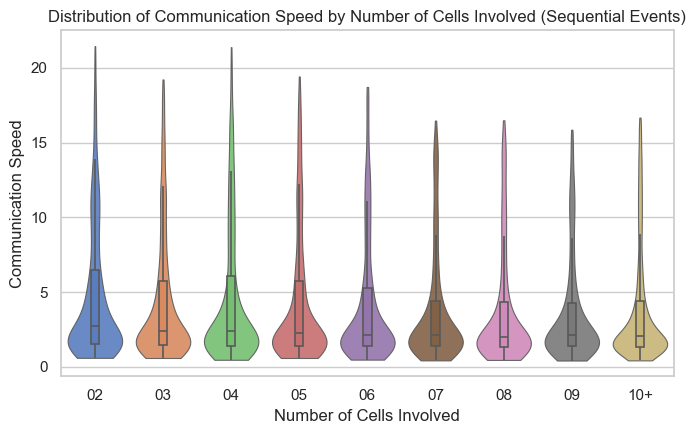

In [8]:

plot_violin(
    subset_peaks_sequential_events,
    x="Number of cells involved category",
    y="Duration (s)",
    title="Distribution of Peak Duration by Number of Cells Involved (Sequential Events)",
    xlabel="Number of Cells Involved",
    ylabel="Peak Duration",
    width=0.8,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    dodge=False,
    outliers_bygroup="Number of cells involved category",
    save_svg_path=figure_path / "figure_3_6/distribution_of_peak_values_by_number_of_cells_involved.svg"
)
plot_violin(
    subset_peaks_sequential_events,
    x="Number of cells involved category",
    y="Prominence (noise std units)",
    title="Distribution of Peak Prominence by Number of Cells Involved (Sequential Events)",
    xlabel="Number of Cells Involved",
    ylabel="Peak Prominence",
    width=0.8,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    dodge=False,
    outliers_bygroup="Number of cells involved category",
    save_svg_path=figure_path / "figure_3_6/distribution_of_peak_values_by_number_of_cells_involved_prominence.svg"
)
plot_violin(
    control_communications,
    x="Number of cells involved category",
    y="Speed (um/s)",
    title="Distribution of Communication Speed by Number of Cells Involved (Sequential Events)",
    xlabel="Number of Cells Involved",
    ylabel="Communication Speed",
    width=0.8,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    dodge=False,
    outliers_bygroup="Number of cells involved category",
    save_svg_path=figure_path / "figure_3_6/distribution_of_peak_values_by_number_of_cells_involved_speed.svg"
)

## FIGURE 3.7

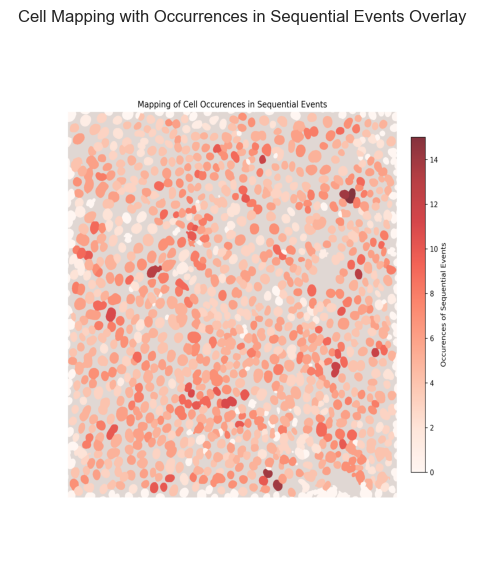

[2025-08-17 13:02:16] [INFO] calcium: build_neighbor_pair_stats: built 16198 pairs across 5 datasets (mean distance=16.09 um)
[2025-08-17 13:02:16] [INFO] calcium: plot_histogram: removed 3 outliers out of 4293 on 'Distance (um)' (lower=-5, upper=36.58)
[2025-08-17 13:02:16] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\figure_3_7\reference_communications_distance_distribution.svg (svg)


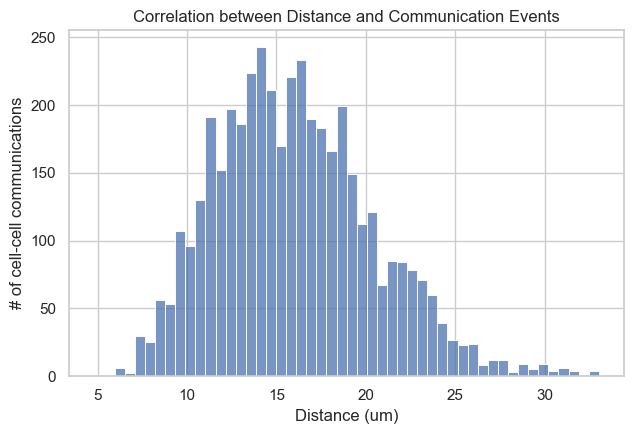

[2025-08-17 13:02:16] [INFO] calcium: plot_histogram: removed 2 outliers out of 3086 on 'distance_um' (lower=-4.1274, upper=36.679)
[2025-08-17 13:02:17] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\figure_3_7\pairs_communication_distance_distribution.svg (svg)


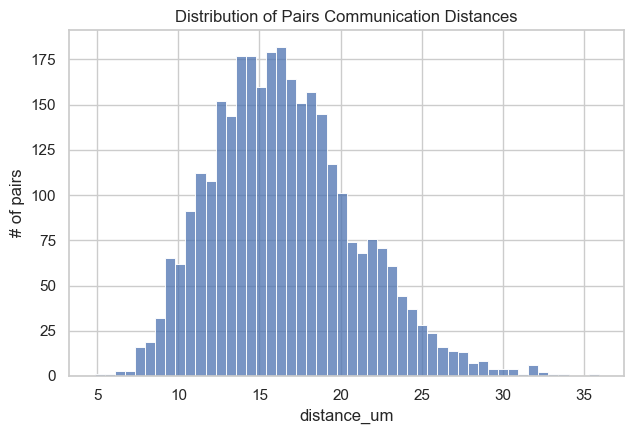

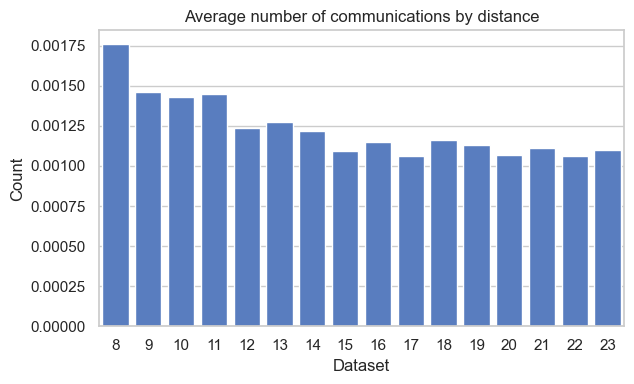

c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1374: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(


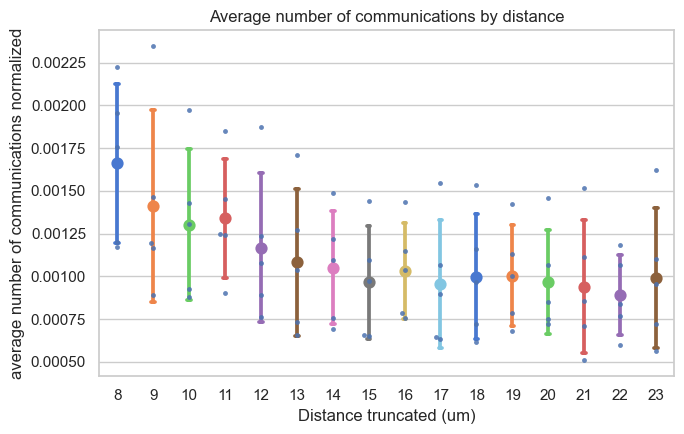

In [26]:
visualize_image(
    image_source=reference_dataset["path"],
    image_name="cell-mapping/cell_Occurences_in_sequential_events_overlay.png",
    title="Cell Mapping with Occurrences in Sequential Events Overlay",
    figsize=(5, 6)
)

pairs_communication_df = build_neighbor_pair_stats(
    cells_df=control_cells,
    comm_df=control_communications,
    dataset_col="dataset",
    cell_id_col="Cell ID",
    centroid_x_col="Centroid X coordinate (um)",
    centroid_y_col="Centroid Y coordinate (um)",
    neighbors_col="Neighbors (labels)",
    edge_cols=("Cell ID", "Neighbor ID")
    )

plot_histogram(
    df=reference_communications,
    column="Distance (um)",
    title="Correlation between Distance and Communication Events",
    ylabel="# of cell-cell communications",
    bin_count=50,
    filter_outliers=True,
    outliers_bounds=(3,3),
    save_svg_path=figure_path / "figure_3_7/reference_communications_distance_distribution.svg"
)

plot_histogram(
    df=pairs_communication_df[pairs_communication_df["dataset"]=="20250326_IS1"],
    column="distance_um",
    title="Distribution of Pairs Communication Distances",
    ylabel="# of pairs",
    bin_count=50,
    filter_outliers=True,
    outliers_bounds=(3,3),
    save_svg_path=figure_path / "figure_3_7/pairs_communication_distance_distribution.svg"
)

pairs_communication_df["Distance truncated (um)"] = np.floor(pairs_communication_df["distance_um"]).astype(int)
average = pairs_communication_df.groupby(["dataset", "Distance truncated (um)"], as_index=False)
comm_by_distance_df = average.agg(n_pairs=("n_communications", "size"), total_communications=("n_communications", "sum"))
comm_by_distance_df["average number of communications"] = comm_by_distance_df["total_communications"] / comm_by_distance_df["n_pairs"]

events_df = control_sequential_events.groupby("dataset", as_index=False).size().rename(columns={"size": "n_events"})
comm_by_distance_df = comm_by_distance_df.merge(events_df, on="dataset", how="left")
comm_by_distance_df["n_events"] = comm_by_distance_df["n_events"].fillna(0).astype(int)
comm_by_distance_df["average number of communications normalized"] = comm_by_distance_df["average number of communications"] / comm_by_distance_df["n_events"]

plot_bar(
    df=comm_by_distance_df[(comm_by_distance_df["Distance truncated (um)"] >= 8) & (comm_by_distance_df["Distance truncated (um)"] <= 23) & (comm_by_distance_df["dataset"]=="20250326_IS1")],
    axis_column="Distance truncated (um)",
    value_column="average number of communications normalized",
    rotation=0,
    title=f"Average number of communications by distance",
    palette="muted",
    hue_column="dataset",
    save_svg_path=figure_path / "figure_3_7/reference_dataset_average_number_of_communications_by_distance_barplot.svg"
)

plot_points_mean_std(
    df=comm_by_distance_df[(comm_by_distance_df["Distance truncated (um)"] >= 8) & (comm_by_distance_df["Distance truncated (um)"] <= 23)],
    x="Distance truncated (um)",
    y="average number of communications normalized",
    title="Average number of communications by distance",
    save_svg_path=figure_path / "figure_3_7/reference_dataset_average_number_of_communications_by_distance_points.svg"
)
